In [1]:
from config import *
from models import *

model = SceneLearner(config)

In [2]:
from datasets import *
B = 1
dataset = StructureGroundingDataset(config, category="chair", split = "train")
dataloader = DataLoader(dataset, batch_size = B, shuffle = True)

# [Get A Sample Data]
for sample in dataloader:
    sample, gt = sample

loss
recon_pc
masks
abstract_scene
features
positions
components


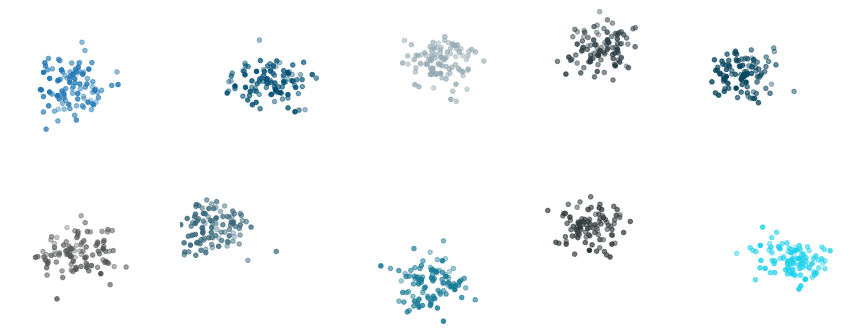

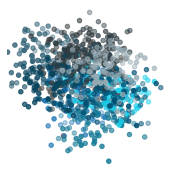

In [63]:
import matplotlib.pyplot as plt
outputs = model.part_perception(sample)
for k in outputs:print(k)
components = outputs["components"]

def visualize_pointcloud_components(pts):
    namo_colors = [
    '#1f77b4',  # muted blue
    '#005073',  # safety orange
    '#96aab3',  # cooked asparagus green
    '#2e3e45',  # brick red
    '#08455e',  # muted purple
    '#575959',  # chestnut brown
    '#38677a',  # raspberry yogurt pink
    '#187b96',  # middle gray
    '#31393b',  # curry yellow-green
    '#1cd1ed'   # blue-teal
    ]
    N = pts.shape[0]
    rang = 0.7
    s = 3.0
    fig = plt.figure("visualize",figsize=(s * N//2,s * 2), frameon = True)
    full_fig = plt.figure("full_viz", figsize = (s,s), frameon = False)
    full_rows = 2
    full_cols = N // 2 
    full_ax = full_fig.add_subplot(1,1,1,projection='3d')
    full_ax.set_axis_off()
    full_ax.set_zlim(-rang,rang);full_ax.set_xlim(-rang,rang);full_ax.set_ylim(-rang,rang)
    for i in range(N):
        row = i // full_cols
 
        ax = fig.add_subplot(2, full_cols , 1 + i  , projection='3d')
        ax.set_zlim(-rang,rang);ax.set_xlim(-rang,rang);ax.set_ylim(-rang,rang)
        # make the panes transparent
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis._axinfo['axisline']['linewidth'] = 1
            axis._axinfo['axisline']['color'] = (0, 0, 0)
            axis._axinfo['grid']['linewidth'] = 0.5
            axis._axinfo['grid']['linestyle'] = "-"
            axis._axinfo["grid"]['color'] =  (1,1,1,0)
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            axis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.set_axis_off()
        #ax.view_init(elev = -80, azim = -90)
        coords = pts[i]
        colors = namo_colors[i]
        ax.scatter(coords[:,0],coords[:,1],coords[:,2], c = colors)
        full_ax.scatter(coords[:,0],coords[:,1],coords[:,2], c = colors)
    fig.savefig("outputs/pc_components.png")
    full_fig.savefig("outputs/pc_full_components.png")
#visualize_pointcloud_components(components[0])
splits = np.load("outputs/splits.npy")[0]
visualize_pointcloud_components(splits)